# Exporatory Data Analysis

In this document, I will import my data, review it briefly and do some light preprocessing.

# Packages and Settings

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Optional
from pathlib import Path
from sklearn.model_selection import train_test_split
from utils import *

raw_path = Path("../data/raw/raw_data.csv")
out_path = Path("../data/processed")

# Import Data

In [19]:
df = pd.read_csv(raw_path)

# Review Data

In [20]:
df.head()

,Quote_ID,Agency,Issued,Quote_Platform,Eff_Date,Liab_Only,ST,Zipcode,Terr,Min_Veh_Yr,Max_Veh_Yr,MultiProduct_Discount,Life_Discount,MultiCar,Acc_Viol_Score,Ins_Score,BI_Limit,Driver1_Age,Driver2_Age
0,954903671,Epsilon,Y,eQuote,201903,N,IN,47060,38,2001,2004,Auto Home,N,Y,2,800-824,100/300,20-24,55-59
1,954905712,Gamma,N,eQuote,201903,N,IN,47031,92,1996,2003,Auto Home,N,Y,0,850-874,250/500,50-54,55-59
2,954908074,Alpha,N,eQuote,201903,N,IN,47025,38,2001,2011,Auto Home,N,Y,0,800-824,100/300,20-24,45-49
3,955001034,Epsilon,N,eQuote,201903,N,IN,47025,38,2005,2013,Auto Home,N,Y,0,750-774,100/300,<20,35-39
4,955105734,Epsilon,N,eQuote,201903,N,IN,47001,38,2000,2013,Homeowner,N,Y,0,850-874,100/300,50-54,50-54


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Quote_ID               5706 non-null   int64 
 1   Agency                 5706 non-null   object
 2   Issued                 5706 non-null   object
 3   Quote_Platform         5706 non-null   object
 4   Eff_Date               5706 non-null   int64 
 5   Liab_Only              5706 non-null   object
 6   ST                     5706 non-null   object
 7   Zipcode                5706 non-null   int64 
 8   Terr                   5706 non-null   int64 
 9   Min_Veh_Yr             5706 non-null   int64 
 10  Max_Veh_Yr             5706 non-null   int64 
 11  MultiProduct_Discount  3044 non-null   object
 12  Life_Discount          5706 non-null   object
 13  MultiCar               5706 non-null   object
 14  Acc_Viol_Score         5706 non-null   int64 
 15  Ins_Score            

In [22]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Quote_ID,5706.0,NaN,NaN,NaN,2989218392.259902,1338118518.425575,954404751.0,2160802254.25,2456401258.0,3063478743.0,8662008279.0
Agency,5706,10,Epsilon,1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issued,5706,2,N,5137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quote_Platform,5706,3,PLRATING,3449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eff_Date,5706.0,NaN,NaN,NaN,201957.173326,49.63376,201903.0,201907.0,202001.0,202006.0,202012.0
Liab_Only,5706,2,N,5122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ST,5706,1,IN,5706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zipcode,5706.0,NaN,NaN,NaN,46751.924641,556.109945,40208.0,46227.0,46761.0,47031.0,59808.0
Terr,5706.0,NaN,NaN,NaN,43.043113,33.251385,1.0,7.0,38.0,68.0,108.0
Min_Veh_Yr,5706.0,NaN,NaN,NaN,2006.135647,5.978533,1996.0,2001.0,2006.0,2011.0,2020.0


I can see the following issues I'll need to deal with:

1) Missing values: MultiProduct_Discount and Driver2_Age have some missing values; nothing else does
2) Wrong data types: Zipcode and Terr are currently numeric, but they are more qualitative than quantitative
3) ID fields/irrelevant fields: Quote_ID is not a relevant field for prediction and ST is only IN, so useless for the model
4) Target variable definition: Issued is a Y/N and should be encoded to 1/0
5) Time-based considerations: Eff_date is the only time field available, but I have a feeling seasonality and month will be somewhat useful for the model to consider, so I'll need to do some work there.

# Process Data

## Missing Values

In [23]:
# MultiProduct_Discount null simply means it is a monoline policy
df["MultiProduct_Discount"] = df["MultiProduct_Discount"].fillna("Monoline")
# Driver2_Age null simply means there is no second driver on the policy
df["Driver2_Age"] = df["Driver2_Age"].fillna("No Second Driver")

## Data Types

In [24]:
df["Zipcode"] = (
  df["Zipcode"]
  .astype("Int64")
  .astype("string")
  .str.zfill(5)
  .astype("category")
)

df["Terr"] = df["Terr"].astype("category")

## Target

In [25]:
df["bind_ind"] = df["Issued"].eq("Y").astype(int)

## Time

This one is the most involved. My thought here is to include some simple year, month and quarter, but also time since first month and a cyclical transformed time of the year value.

In [26]:
df["eff_year"] = df["Eff_Date"] // 100
df["eff_month"] = df["Eff_Date"] % 100
df["Eff_Date_dt"] = pd.to_datetime(dict(year=df["eff_year"], month=df["eff_month"], day=1))
df["eff_quarter"] = ((df["eff_month"] - 1) // 3 + 1)
df["eff_month_index"] = (
    (df["Eff_Date_dt"].dt.year - df["Eff_Date_dt"].dt.year.min()) * 12
    + (df["Eff_Date_dt"].dt.month - df["Eff_Date_dt"].dt.month.min())
)
df["eff_month_sin"] = np.sin(2 * np.pi * (df["eff_month"] - 1) / 12.0)
df["eff_month_cos"] = np.cos(2 * np.pi * (df["eff_month"] - 1) / 12.0)

## Review Info Again  

In [27]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Quote_ID,5706.0,NaN,NaN,NaN,2989218392.259902,954404751.0,2160802254.25,2456401258.0,3063478743.0,8662008279.0,1338118518.425575
Agency,5706,10,Epsilon,1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issued,5706,2,N,5137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quote_Platform,5706,3,PLRATING,3449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eff_Date,5706.0,NaN,NaN,NaN,201957.173326,201903.0,201907.0,202001.0,202006.0,202012.0,49.63376
Liab_Only,5706,2,N,5122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ST,5706,1,IN,5706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zipcode,5706,439,46750,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Terr,5706.0,98.0,3.0,587.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min_Veh_Yr,5706.0,NaN,NaN,NaN,2006.135647,1996.0,2001.0,2006.0,2011.0,2020.0,5.978533


# Train/Test Split

Now I'll do a train/test split and define my Ys and Xs.

Note this test split specifically uses the most recent 20% of the data as a test set. The goal is to make sure that the models are good at predicting future months, not just a random assortment of risks across all time.

From this point forward, I'll only use the train subset to do analysis. I'll look at test later.

In [28]:
y = df["bind_ind"]
X = df.drop(columns=["bind_ind", "Quote_ID", "Issued", "ST"])

X_train, X_test, y_train, y_test = split_train_test_by_time(
    X,
    y,
    yyyymm_col="Eff_Date",
    test_frac=0.2,   # e.g. target ~20% of rows as test
)
X_train = X_train.drop(columns=["Eff_Date_dt", "Eff_Date"])
X_test = X_test.drop(columns=["Eff_Date_dt", "Eff_Date"])

Train months: [201903 201904 201905 201906 201907 201908 201909 201910 201911 201912
 202001 202002 202003 202004 202005 202006]
Test  months: [202007 202008 202009 202010 202011 202012]
Requested test frac: 0.200, actual: 0.238


The dataset is not very large. How does our sample size look?

In [29]:
X_design = pd.get_dummies(X_train, drop_first=True)
n, p = X_design.shape
print("sample proportion:", (((y_train.mean())*100).round(1).astype(str)+"%"))
print("n (rows):", n)
print("p (features):", p)

sample proportion: 9.4%
n (rows): 4346
p (features): 624


Oof. So we have roughly 400 binds with 624 features. We likely have too many high-dimensionality features. 

I see one easy solution here- Zipcode and Terr are both categorical geographic features with many unique values. I don't think we need both. Territory is just an aggregated version of Zipcode, so I'll remove Zipcode to help with this problem.

In [30]:
X_train = X_train.drop(columns=["Zipcode"])
X_test = X_test.drop(columns=["Zipcode"])
X_design = pd.get_dummies(X_train, drop_first=True)
n, p = X_design.shape
print("sample proportion:", (((y_train.mean())*100).round(1).astype(str)+"%"))
print("n (rows):", n)
print("p (features):", p)

sample proportion: 9.4%
n (rows): 4346
p (features): 186


This is better and avoids two clearly nested, high-dimensional variables at the same time. It still isn't great. I see we'll have roughly about 2 positives per feature on average, which is not a lot. 

Another thought I have here is that Agency and Terr are likely overlapping as well. Agents likely sell within certain geographical areas more than others. So I also do not think we need both Agency and Terr at the same time. 

In [31]:
X_train = X_train.drop(columns=["Terr"])
X_test = X_test.drop(columns=["Terr"])
X_design = pd.get_dummies(X_train, drop_first=True)
n, p = X_design.shape
print("sample proportion:", (((y_train.mean())*100).round(1).astype(str)+"%"))
print("n (rows):", n)
print("p (features):", p)

sample proportion: 9.4%
n (rows): 4346
p (features): 89


Now I am up to around 4-5 positive observations per feature. That's much better than I started with. 

Ideally, I'd pull in more geographical data that is not categorical. Demographics, other things like that. Or I'd simply go get more data from the source system. That's a good exercise for a more robust, production model but for now I'll leave it here.

# Univariate Views

Here, I'll review the sample proportion and +/- 1 standard error from that sample proportion by each variable. The goal here is to review if the variables I've selected have a linear or other type of relationship with the target variable.

In [32]:
def combo_multi_axis(
    df: pd.DataFrame,
    x_col: Union[str, pd.Series],
    target_col: Union[str, pd.Series] = "bind_ind",  # already 0/1
    min_unique: int = 12,      # <= min_unique => categorical; > min_unique => numeric
    n_bins: int = 10,          # equal-frequency bins for numeric
    min_obs: float = 0.01,     # proportion threshold (e.g., 0.01 = 1%)
    title: Optional[str] = None,
    sort_by: str = "group",        # "group", "pct", or "fatality"
    ascending: Optional[bool] = None,
):
    """
    Reproduction of the R combo_multi_axis() function in Python.

    Parameters
    ----------
    df : DataFrame
        Source data.
    x_col : str or Series
        Column name (or Series) for the x variable.
    target_col : str or Series, default "bind_ind"
        Column name (or Series) for 0/1 indicator.
    min_unique : int, default 12
        If number of unique raw x values <= min_unique, treat as categorical.
        If > min_unique and we can parse numerically (or original is numeric),
        treat as numeric.
    n_bins : int, default 10
        Number of equal-frequency bins for numeric case.
    min_obs : float, default 0.01
        Proportion threshold below which categorical levels are collapsed into
        "All Other" (NA kept separate).
    title : str, optional
        Custom plot title. If None, a default is constructed.

    Returns
    -------
    fig : matplotlib.figure.Figure
        The created figure.
    (ax_left, ax_right) : tuple of Axes
        Left axis (bars) and right axis (line).
    """

    # --- Resolve columns / series ------------------------------------------------
    df_base = df.copy()

    if isinstance(target_col, str):
        df_base["..fatal"] = pd.to_numeric(df_base[target_col], errors="coerce")
    else:
        # assume Series aligned with df
        df_base["..fatal"] = pd.to_numeric(target_col, errors="coerce")

    if isinstance(x_col, str):
        x_raw = df_base[x_col]
        x_lab = x_col
    else:
        x_raw = pd.Series(x_col, index=df_base.index)
        x_lab = getattr(x_col, "name", "x")

    # --- Raw x and uniqueness checks --------------------------------------------
    x_as_chr = x_raw.astype(str)
    nuniq = x_as_chr.nunique(dropna=True)

    # Try numeric parse regardless of original type
    x_as_num = pd.to_numeric(x_as_chr, errors="coerce")
    has_any_numeric = x_as_num.notna().sum() > 0

    # Decide whether to treat as numeric
    treat_as_numeric = has_any_numeric and (
        np.issubdtype(x_raw.dtype, np.number) or (nuniq > min_unique)
    )

    # -------------------------------------------------------------------------
    # Numeric path: equal-frequency bins + explicit NA bucket
    # -------------------------------------------------------------------------
    if treat_as_numeric:
        df_binned = df_base.copy()
        df_binned["..x_num"] = x_as_num

        valid = df_binned["..x_num"].notna()

        if valid.sum() == 0:
            treat_as_numeric = False
        else:
            # qcut gives an ordered Categorical
            bins = pd.qcut(
                df_binned.loc[valid, "..x_num"],
                q=n_bins,
                duplicates="drop",
            )

            # Keep NA as separate explicit group
            df_binned["..group"] = "NA"
            df_binned.loc[valid, "..group"] = bins.astype(str)

            # Build an order map from the qcut categories (in their original order)
            bin_labels_in_order = [str(cat) for cat in bins.cat.categories]
            order_map = {label: i for i, label in enumerate(bin_labels_in_order)}
            # Put NA after all bins
            order_map["NA"] = len(order_map)

            agg = (
                df_binned.groupby("..group", dropna=False)["..fatal"]
                .agg(n="size", fatality_rate="mean")
                .reset_index()
            )

            total_n = len(df_binned)
            agg["pct"] = agg["n"] / total_n
            agg["pct_perc"] = 100 * agg["pct"]
            agg["fat_perc"] = 100 * agg["fatality_rate"]

            # Store numeric bin order so we can sort on it later
            agg["..order"] = agg["..group"].map(order_map)

            type_tag = " [equal-frequency bins]"

    # -------------------------------------------------------------------------
    # Categorical path: collapse rare levels into "All Other", keep NA separate
    # -------------------------------------------------------------------------
    if not treat_as_numeric:
        tmp = df_base.copy()

        # explicit NA label ("NA") for missing
        x_cat = x_raw.astype("object")
        x_cat = x_cat.where(x_cat.notna(), other="NA").astype(str)
        tmp["..x_cat"] = x_cat

        # Shares by level
        shares = (
            tmp["..x_cat"]
            .value_counts(normalize=True)
            .rename_axis("..x_cat")
            .reset_index(name="pct")
        )

        rare_levels = shares.loc[
            (shares["..x_cat"] != "NA") & (shares["pct"] < min_obs), "..x_cat"
        ].tolist()

        df_cat = tmp.copy()
        df_cat["..group"] = np.where(
            df_cat["..x_cat"].isin(rare_levels),
            "All Other",
            df_cat["..x_cat"],
        )

        agg = (
            df_cat.groupby("..group", dropna=False)["..fatal"]
            .agg(
                n="size",
                sample_rate="mean",
            )
            .reset_index()
        )

        total_n = len(df_cat)
        agg["pct"] = agg["n"] / total_n
        agg["pct_perc"] = 100 * agg["pct"]
        agg["fat_perc"] = 100 * agg["sample_rate"]

        # Sort levels by descending share (like arrange(desc(pct_perc)))
        agg = agg.sort_values("pct_perc", ascending=False)

        type_tag = " [categorical]"

    # -------------------------------------------------------------------------
    # Sorting of x-axis groups (NEW STUFF)
    # -------------------------------------------------------------------------
    # Decide default ascending if not specified
    if ascending is None:
        if sort_by == "group":
            ascending = True
        elif sort_by in ("pct", "fatality"):
            ascending = False
        else:
            raise ValueError("sort_by must be 'group', 'pct', or 'fatality'.")

    # If numeric path, we may have ..order from qcut
    has_order = "..order" in agg.columns

    if sort_by == "group":
        if has_order:
            # Numeric: preserve bin order (or reverse if ascending=False)
            agg = agg.sort_values("..order", ascending=ascending)
        else:
            # Categorical: sort by label
            agg = agg.sort_values("..group", ascending=ascending)
    elif sort_by == "pct":
        agg = agg.sort_values("pct_perc", ascending=ascending)
    elif sort_by == "fatality":
        agg = agg.sort_values("fat_perc", ascending=ascending)
    else:
        raise ValueError("sort_by must be 'group', 'pct', or 'fatality'.")
    
    # -------------------------------------------------------------------------
    # Plot with dual axes: bars = % of total, line = sample rate
    # -------------------------------------------------------------------------
    groups = agg["..group"].astype(str).tolist()
    x_pos = np.arange(len(groups))

    fig, ax_left = plt.subplots(figsize=(10, 6))

    # Bars: % of total observations
    ax_left.bar(x_pos, agg["pct_perc"], alpha=0.7)
    ax_left.set_ylabel("% of total observations")
    ax_left.set_xticks(x_pos)
    ax_left.set_xticklabels(groups, rotation=30, ha="right")

    # Right axis: sample rate
    ax_right = ax_left.twinx()
    ax_right.plot(x_pos, agg["fat_perc"], marker="o")
    ax_right.set_ylabel("Close rate (%)")

    if title is None:
        title = f"{x_lab} vs % of Total (bars) & Close Rate (line){type_tag}"
    ax_left.set_title(title)

    fig.tight_layout()

    return fig, (ax_left, ax_right)

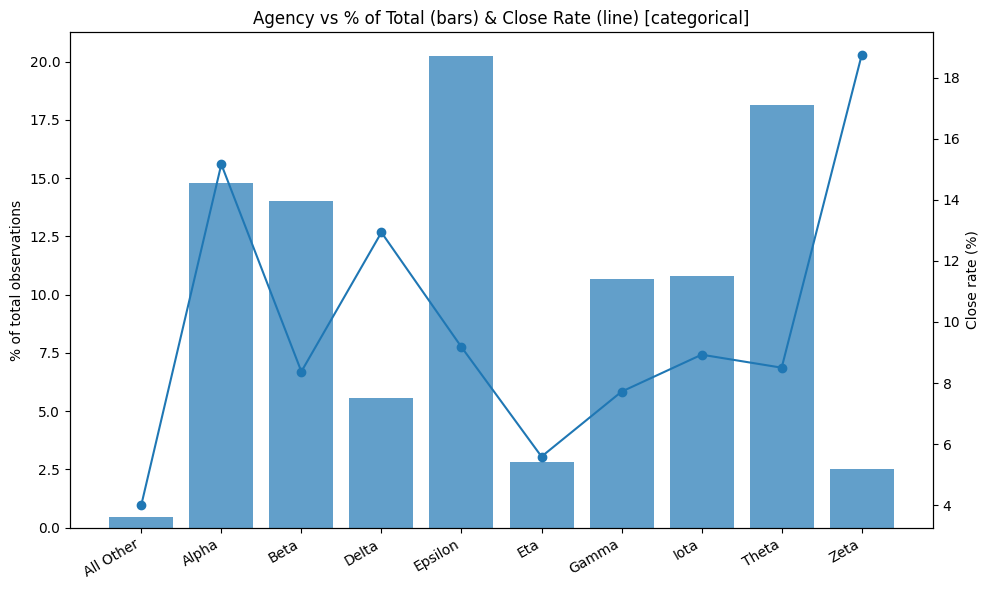

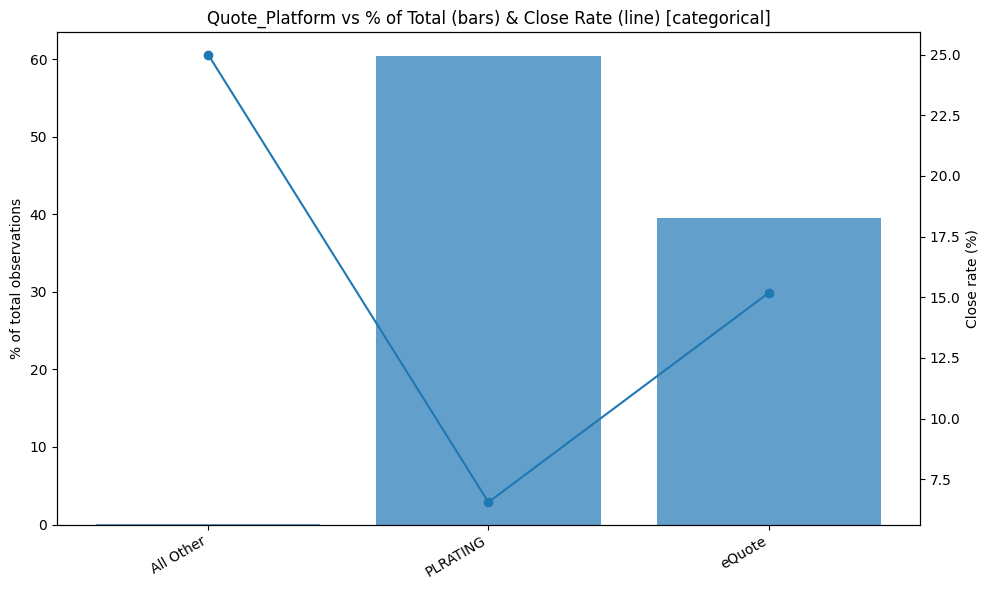

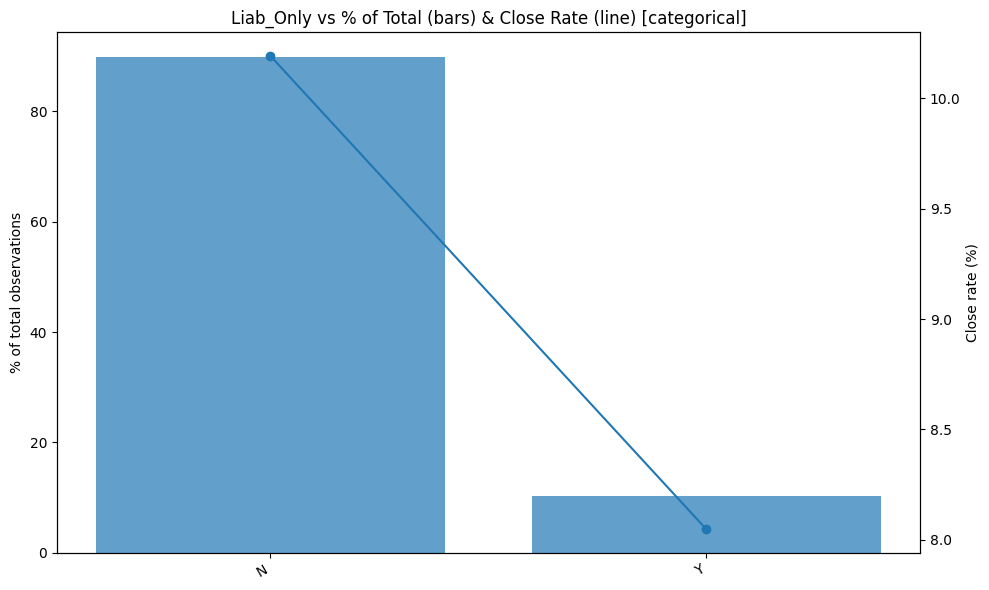

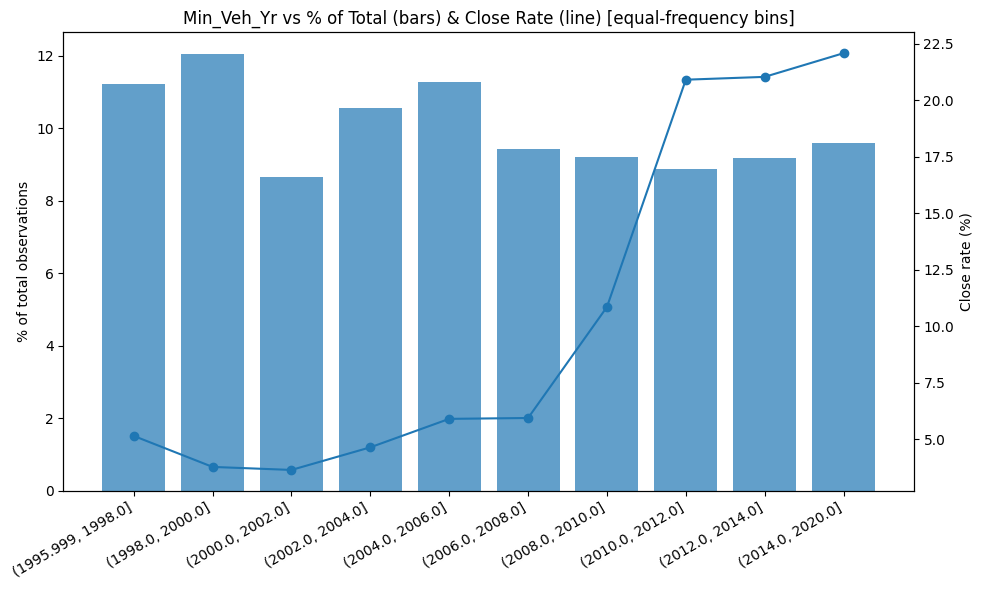

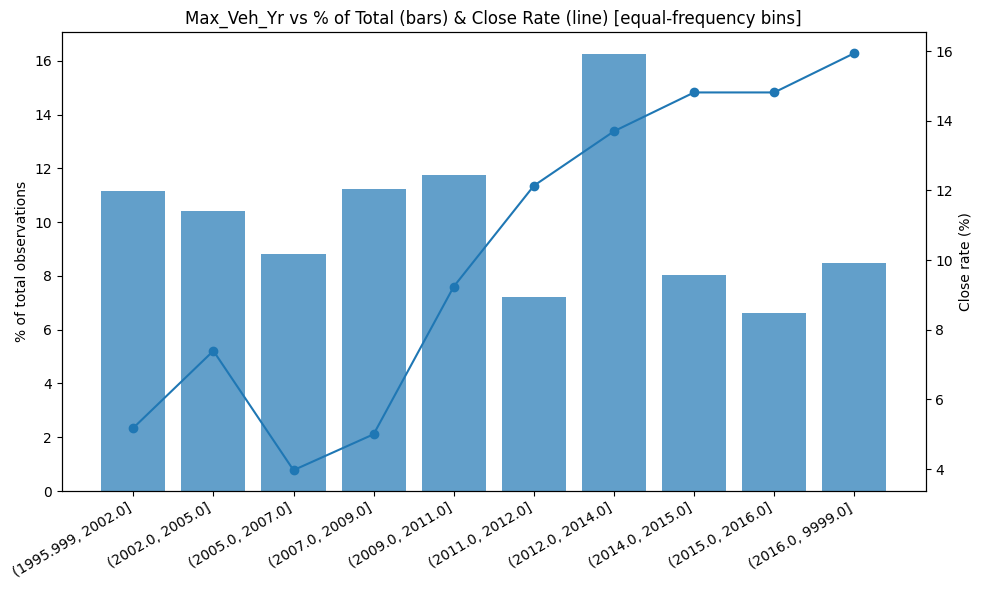

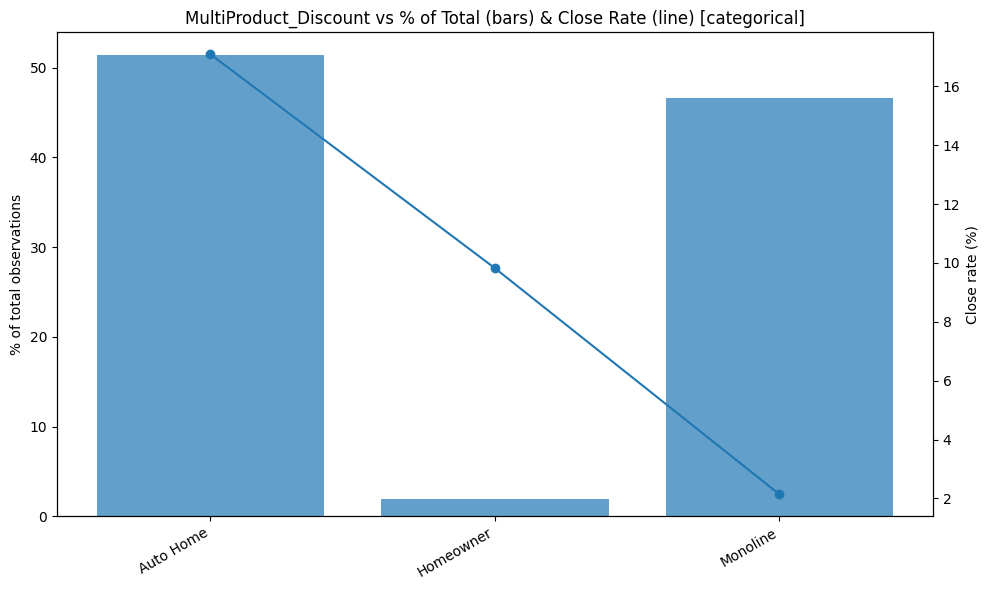

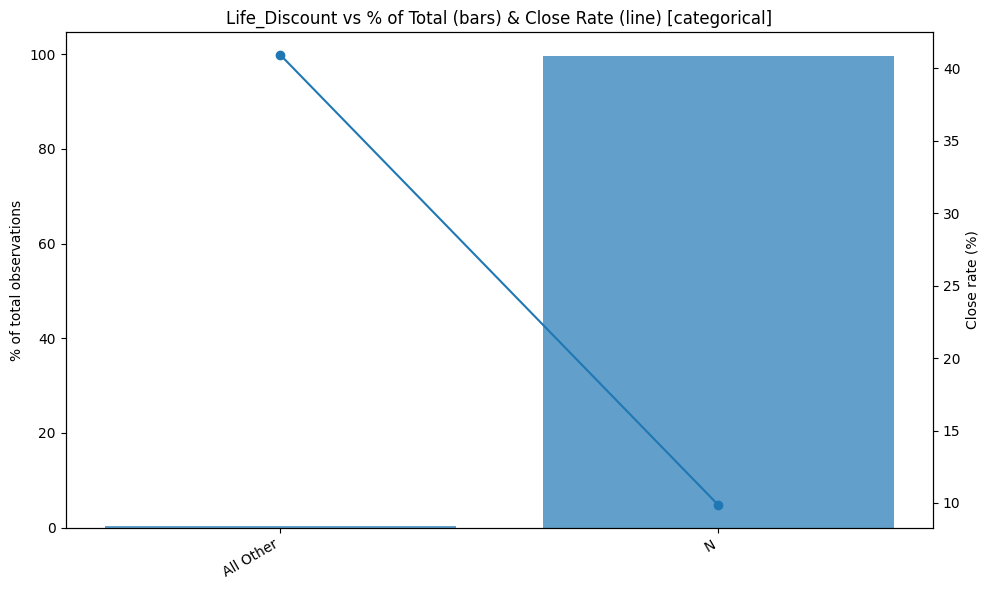

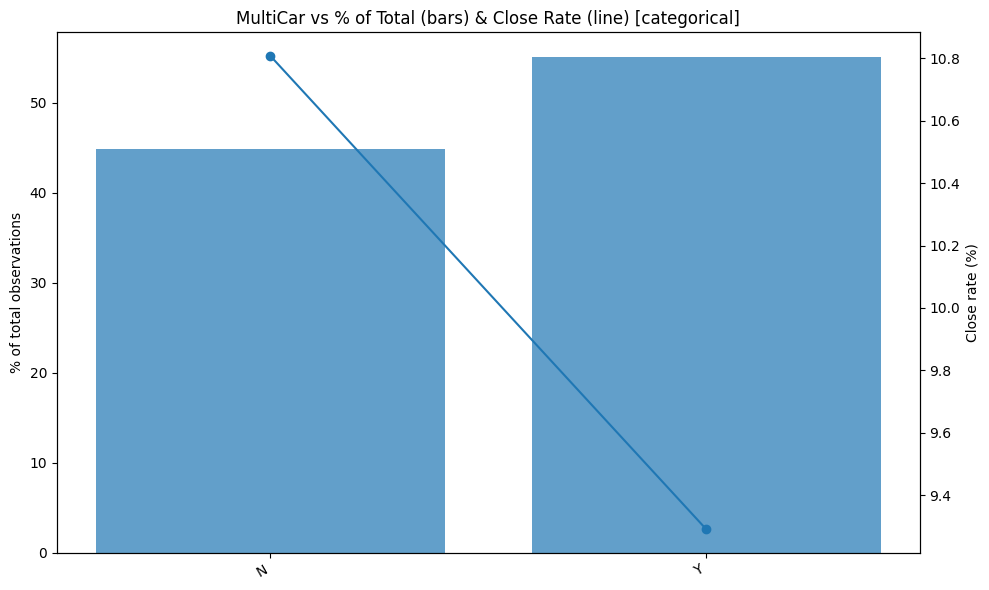

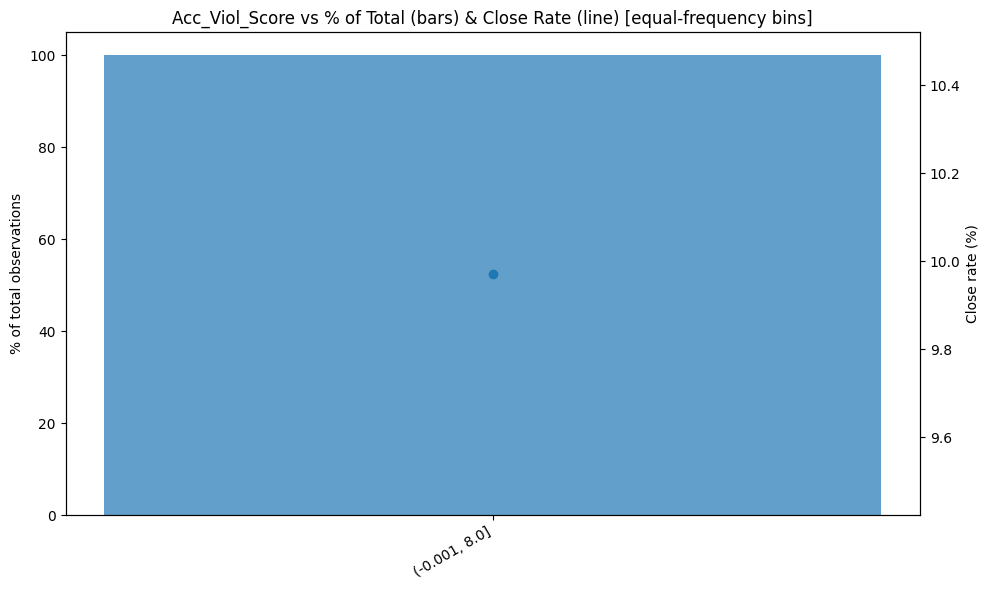

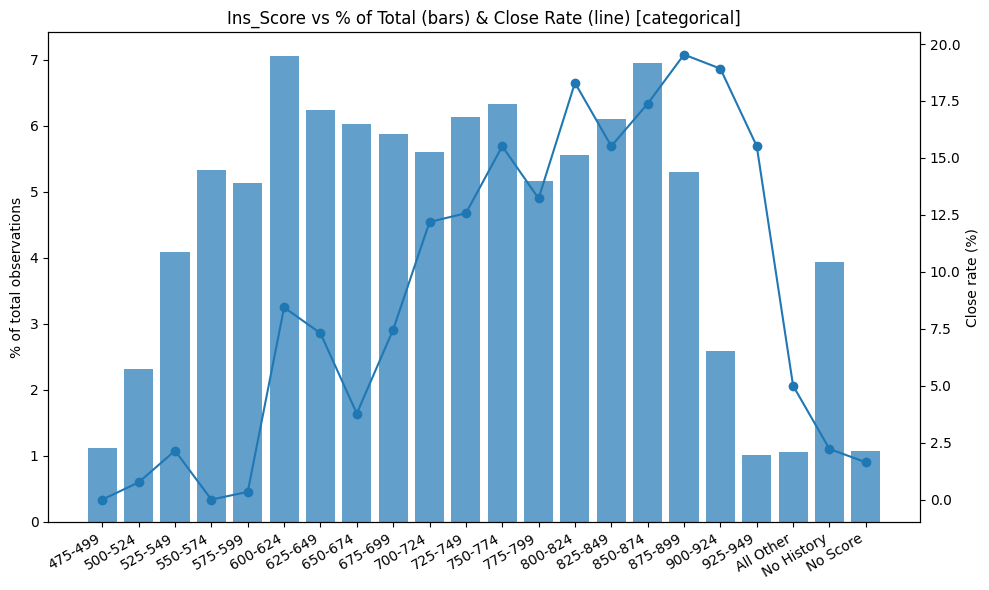

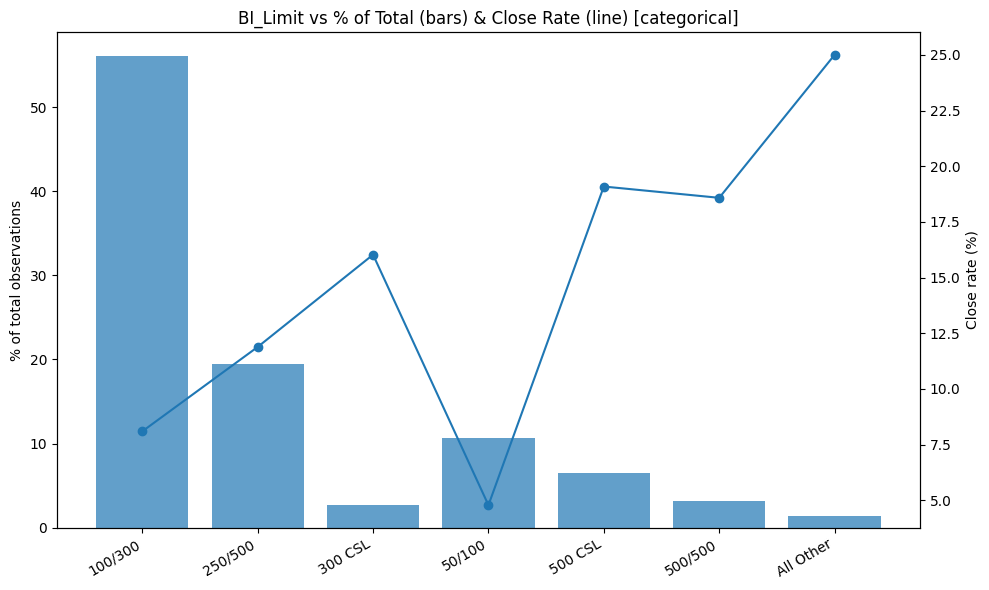

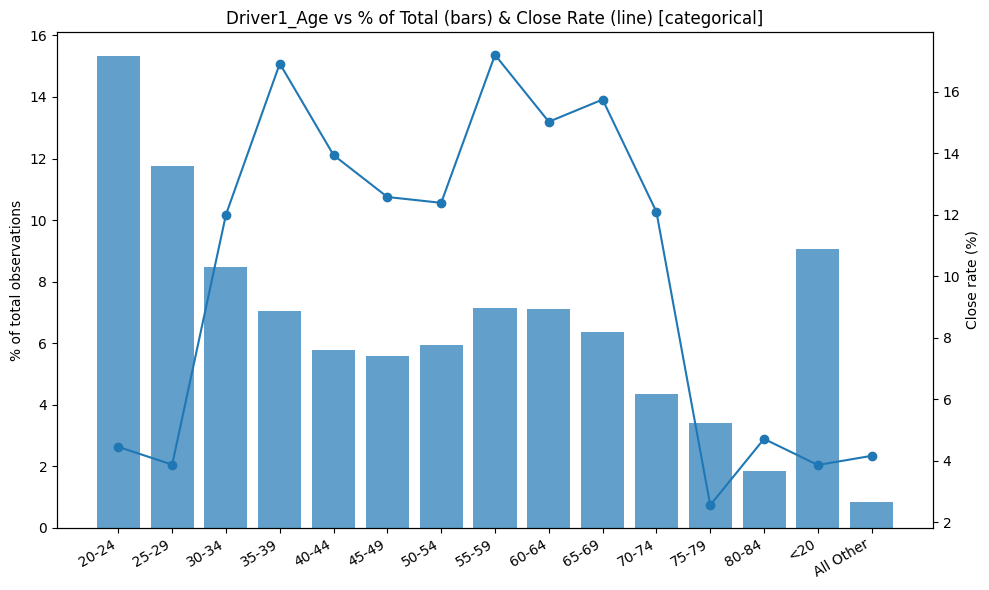

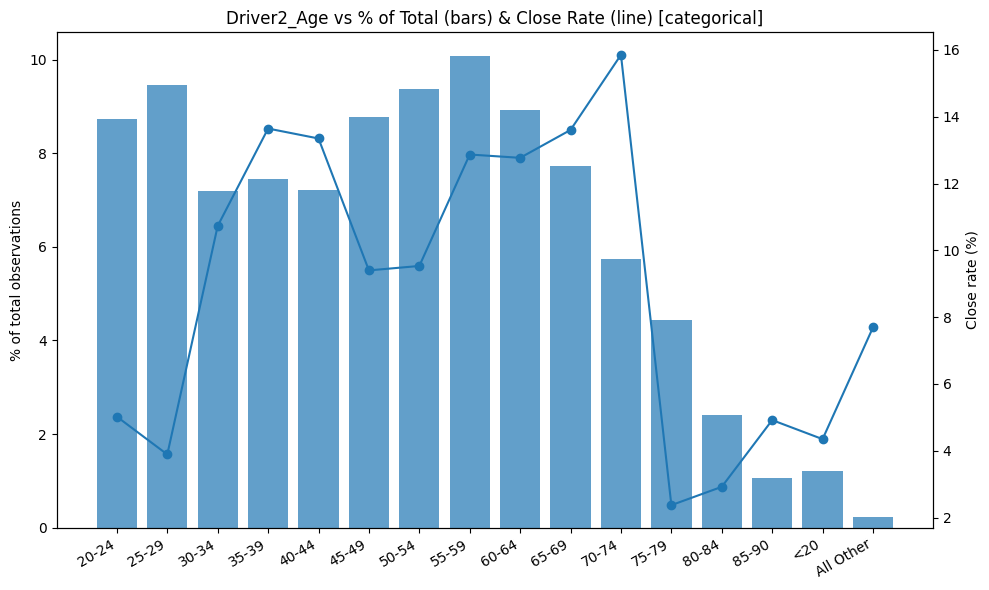

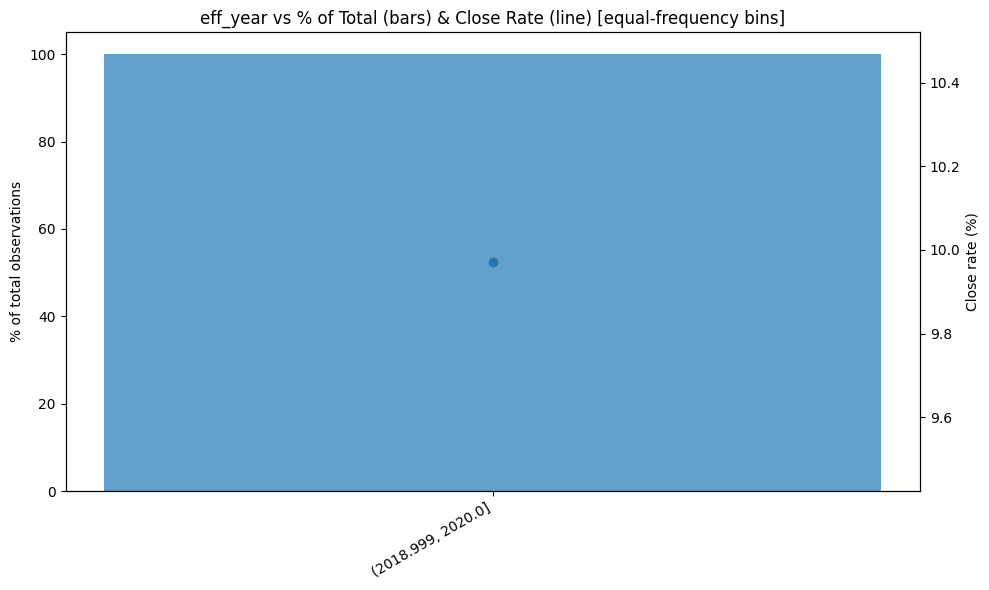

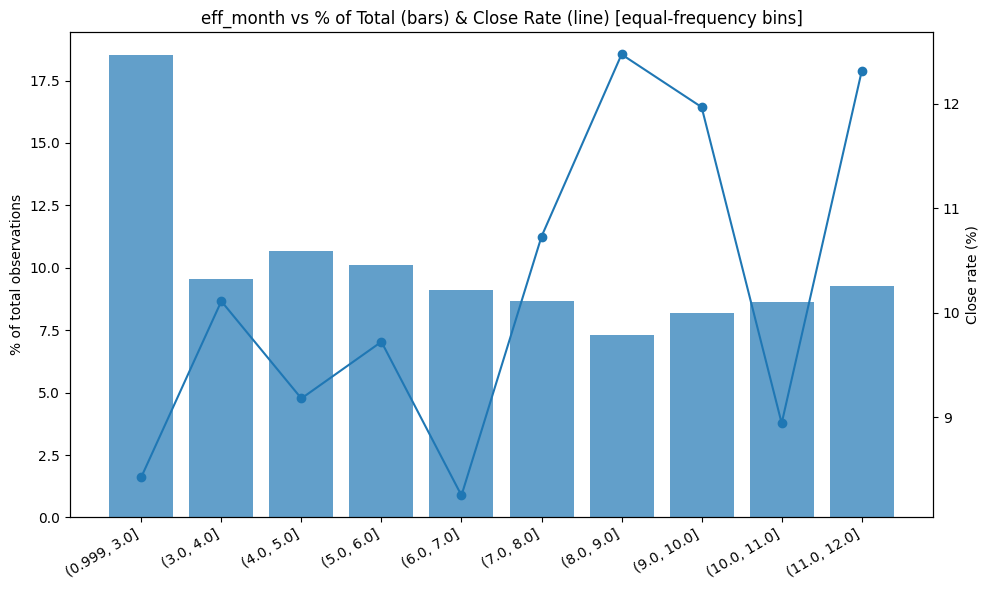

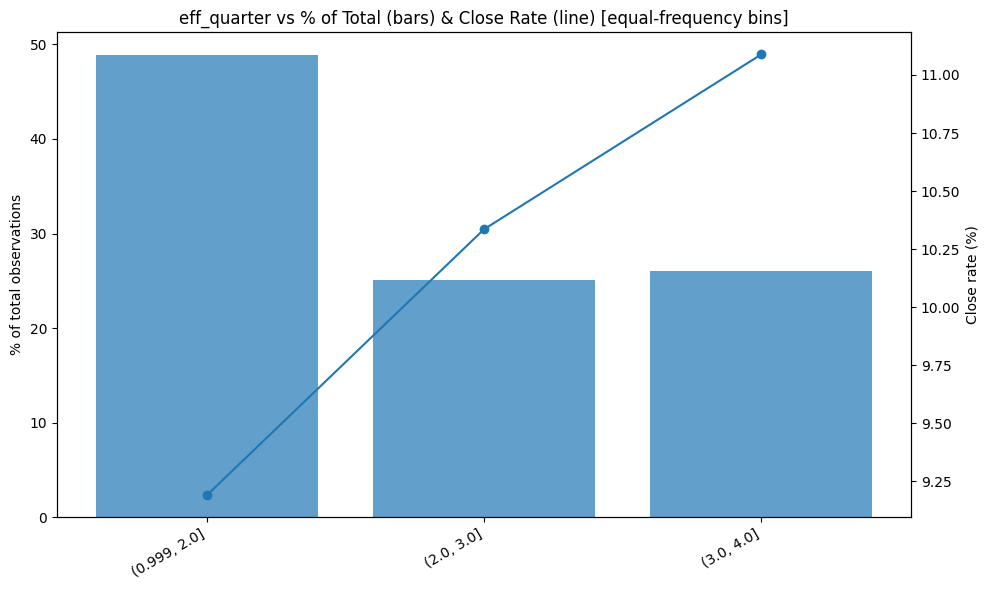

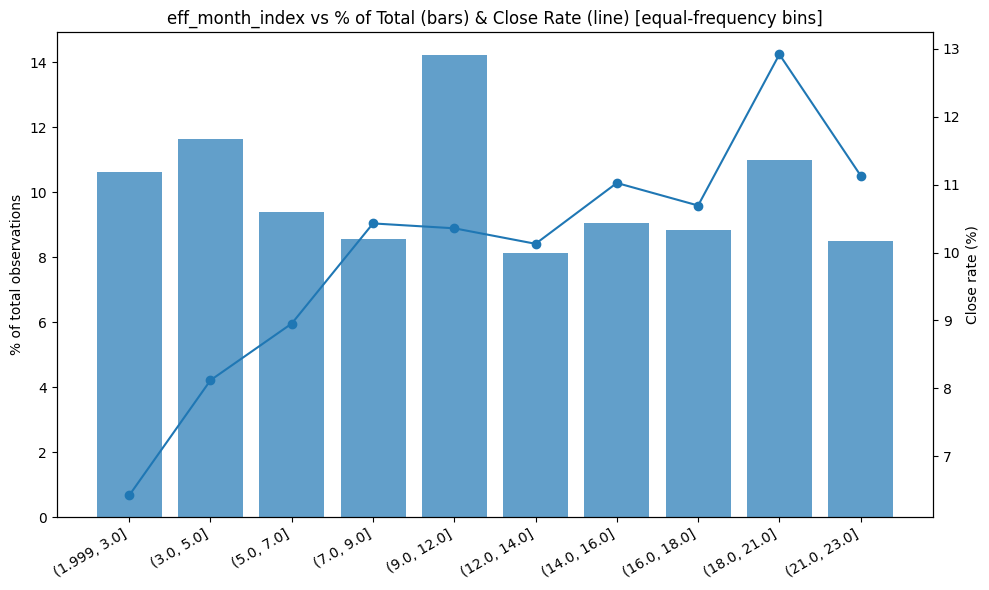

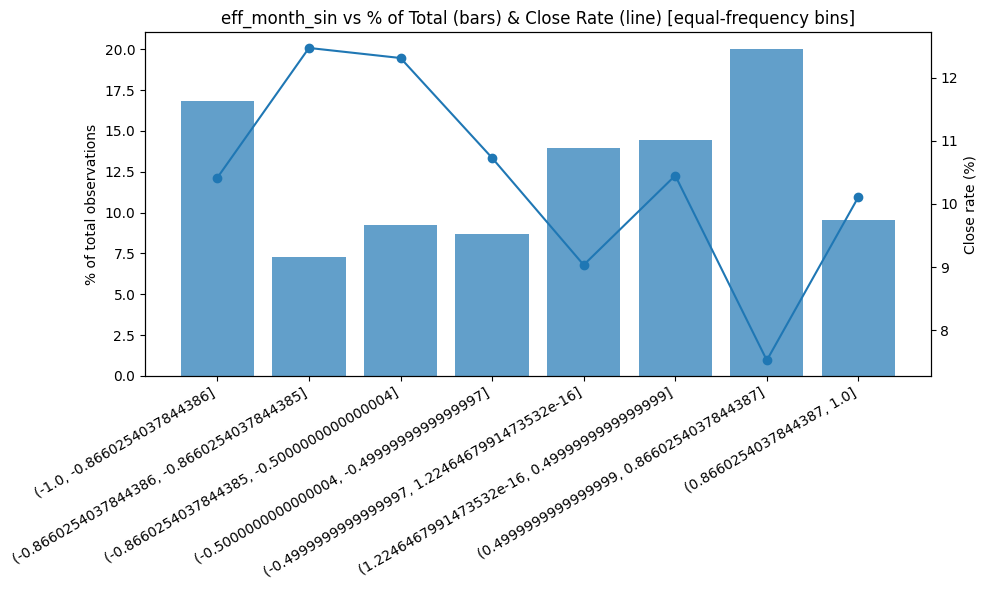

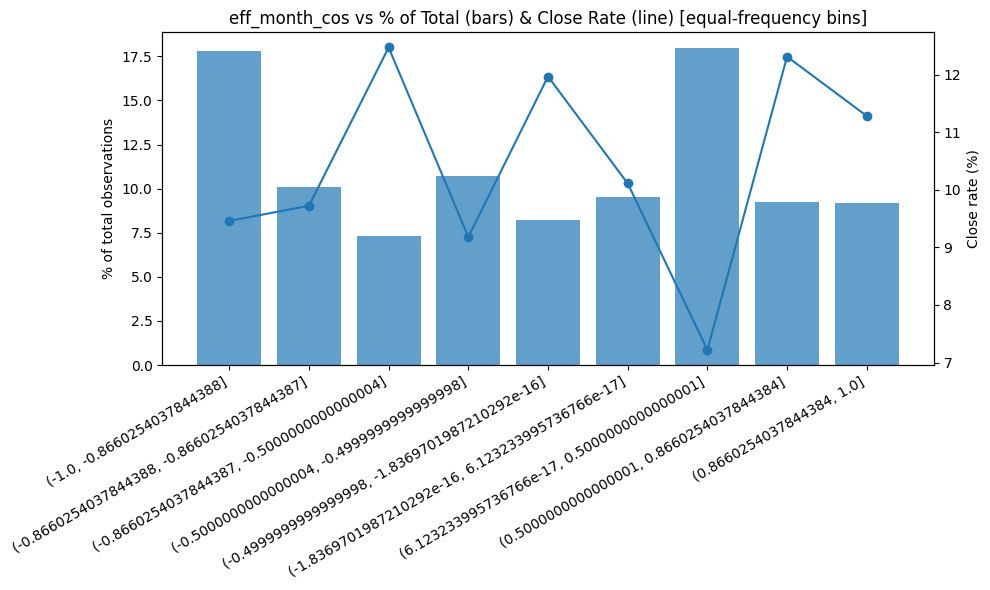

In [33]:
for col in X_train.columns:
    fig, (ax_left, ax_right) = combo_multi_axis(
        df=df,
        x_col=col,
        target_col="bind_ind",  # 0/1 column
        min_unique=12,
        n_bins=10,
        min_obs=0.01,
    )
    plt.show()

A few notes about what I see here:

- Almost all the variables seem important in a 1-way context
- Min_Veh_Yr, Max_Veh_Yr, Ins_Score, Driver1_Age and Driver2_Age all seem to be following a more nonlinear pattern; a plain logistic regression without using something like polynomials or splines would likely greatly underfit
- Time: There is a clear increase month over month in the Close Rate- it starts to level off a little bit. There is also strong seasonality as seen in the eff_quarter variable

# What Next

I am ready to move on with modeling at this point. I like what I see out of the variables I do have!

# Export  

In [ ]:
# make path if necessary
out_path.mkdir(parents=True, exist_ok=True)

# Features
X_train.to_parquet(out_path / "X_train.parquet", index=True)
X_test.to_parquet(out_path / "X_test.parquet", index=True)

# Targets – save as 1-column DataFrames so schema is explicit
y_train.to_frame(name="bin_ind").to_parquet(out_path / "y_train.parquet", index=True)
y_test.to_frame(name="bin_ind").to_parquet(out_path / "y_test.parquet", index=True)